# Anomaly Detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import load_iris
import seaborn as sns

In [2]:
sns.set_style('darkgrid')

In [3]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

Text(0, 0.5, 'Sepal Length')

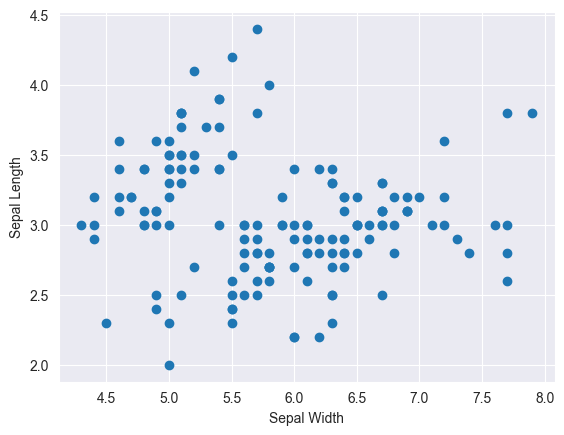

In [4]:
plt.scatter(x=iris.data[:,:1], y=iris.data[:,1:2])
plt.xlabel('Sepal Width')
plt.ylabel('Sepal Length')

In [5]:
# build the KNN model
KNN = NearestNeighbors(n_neighbors=3)
KNN.fit(iris.data)

NearestNeighbors(n_neighbors=3)

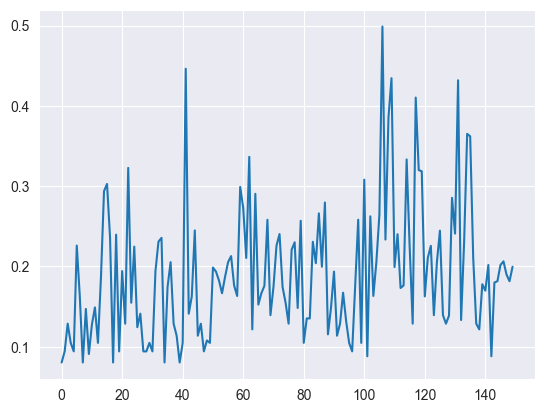

In [6]:
# determine the cutoff point
# calculate average distances

distances, indices = KNN.kneighbors(iris.data)
plt.plot(distances.mean(axis=1))

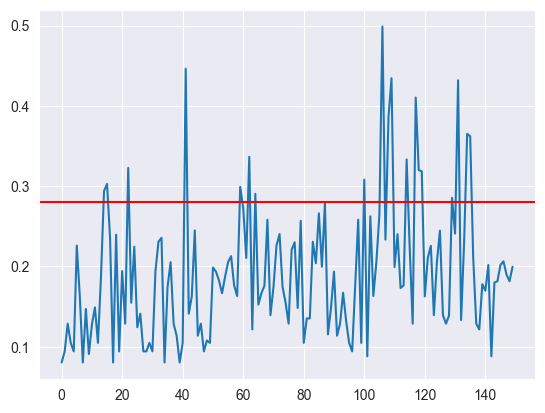

In [7]:
# plot the cutoff point

distances, indices = KNN.kneighbors(iris.data)
plt.plot(distances.mean(axis=1))
plt.axhline(y=0.28, color='r')

In [8]:
anomaly_index = np.where(distances.mean(axis=1) > 0.28)
anomaly_index

(array([ 14,  15,  22,  41,  59,  62,  64, 100, 106, 108, 109, 114, 117,
        118, 119, 129, 131, 134, 135]),)

In [9]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
anomaly_values = df.iloc[anomaly_index]
anomaly_values

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
14,5.8,4.0,1.2,0.2
15,5.7,4.4,1.5,0.4
22,4.6,3.6,1.0,0.2
41,4.5,2.3,1.3,0.3
59,5.2,2.7,3.9,1.4
62,6.0,2.2,4.0,1.0
64,5.6,2.9,3.6,1.3
100,6.3,3.3,6.0,2.5
106,4.9,2.5,4.5,1.7
108,6.7,2.5,5.8,1.8


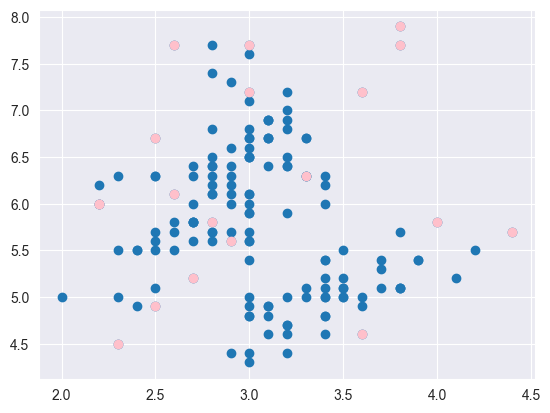

In [11]:
plt.scatter(df['sepal width (cm)'], df['sepal length (cm)'])
plt.scatter(anomaly_values['sepal width (cm)'], anomaly_values['sepal length (cm)'], color='pink')

## Using PyOD

`pip install pyod`

In [12]:
# data prep for iForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#standardize
S_Scaler = StandardScaler()
X_scaled = S_Scaler.fit_transform(iris.data)

In [13]:
# apply PCA - for visualization only
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [14]:
X_pca

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

### Isolation Forest
It's a tree based ensemble that isolates outliers by creating partitions(branches)

In [15]:
from pyod.models.iforest import IForest

# create the model
IF = IForest(random_state=10)

IF.fit(X_scaled)

IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=10,
    verbose=0)

In [16]:
# apply model to predict anomalies
y_pred = IF.predict(X_scaled)

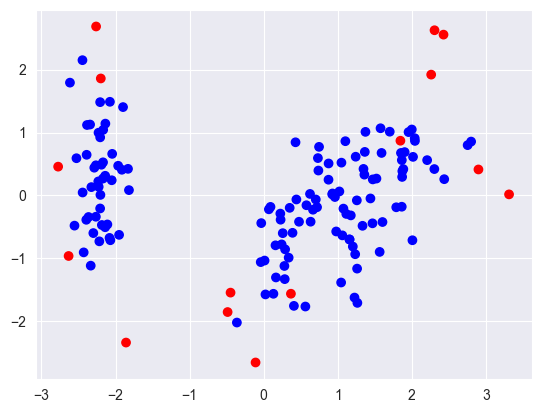

In [17]:
# plotting
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_pred, cmap='bwr')

## ABOD Algorithm
Angle-based Outlier Detection (ABOD) is one of the popular techniques for detecting anomalies or outliers in a given dataset and is often used in practice when working in a multi-variate setting.

In [18]:
from pyod.models.abod import ABOD

model = ABOD()

In [19]:
# fit the model
model.fit(X_scaled)

# apply prediction
y_pred = model.predict(X_scaled)

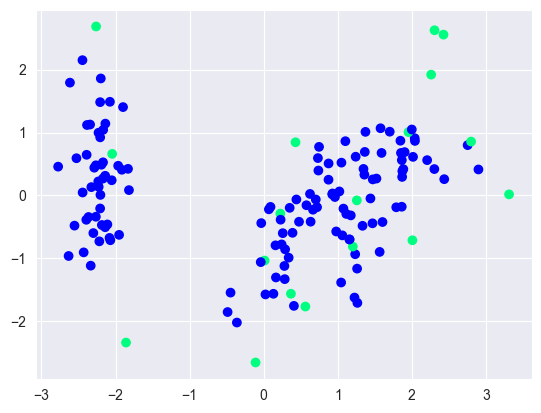

In [20]:
# plotting
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_pred, cmap='winter')